In [1]:
%pip install numpy matplotlib

In [2]:
# a) Implement the standard matrix multiplication algorithm using Python without using any pre-built matrix multiplication functions


def standard_matrix_multiplication (A, B):
    n = len(A)
    # set all elements of the result matrix to 0
    result = [[0] * n for _ in range(n)]
    # multiplication of matrix A and B
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    return result

In [3]:
#b) Analyze and benchmark the runtime of your algorithm on each matrix size. Use the Python time module to record the time taken for each matrix size.

import time  
import random
import math

# padding Function
def pad_matrix_to_power_of_two(A):
    # netermine the nearest power of 2 >= len(A)
    n = len(A)
    m = len(A[0])
    size = max(n, m)
    new_size = 2 ** math.ceil(math.log2(size))
    
    # create new matrix with the new size, filled with 0
    padded_matrix = [[0 for _ in range(new_size)] for _ in range(new_size)]
    
    # copy contents of A into the padded matrix
    for i in range(n):
        for j in range(m):
            padded_matrix[i][j] = A[i][j]
    
    return padded_matrix

def matrix_add(A, B):
    return [[A[i][j] + B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

def matrix_subtract(A, B):
    return [[A[i][j] - B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

def benchmark (matrix_multiplication, A, B):
    start_time = time.time()
    matrix_multiplication(A, B)
    end_time = time.time()
    
    return end_time - start_time # elapsed time

def generate_matrices (n):
    import random
    A = [[random.random() for _ in range(n)] for _ in range(n)]
    B = [[random.random() for _ in range(n)] for _ in range(n)]
    return A, B

#run benchmarks for increasing matrix sizes (up to n = 1000)
matrix_sizes = range(1, 1001, 100)  # we can start with a 10x10 matrix and step by 100 for demonstration. we use 1001, as the last index is not included
standard_times = []

for size in matrix_sizes:
    A, B = generate_matrices(size)
    execution_time = benchmark(standard_matrix_multiplication, A, B)
    standard_times.append(execution_time)
    print("Matrix size", size, "x", size, "took", execution_time, "seconds using standard multiplication \n")


Matrix size 1 x 1 took 0.0 seconds using standard multiplication 

Matrix size 101 x 101 took 0.06399989128112793 seconds using standard multiplication 

Matrix size 201 x 201 took 0.48199987411499023 seconds using standard multiplication 

Matrix size 301 x 301 took 1.7910001277923584 seconds using standard multiplication 

Matrix size 401 x 401 took 4.745000123977661 seconds using standard multiplication 

Matrix size 501 x 501 took 9.503999948501587 seconds using standard multiplication 

Matrix size 601 x 601 took 16.99399971961975 seconds using standard multiplication 

Matrix size 701 x 701 took 27.842999935150146 seconds using standard multiplication 

Matrix size 801 x 801 took 42.039000034332275 seconds using standard multiplication 

Matrix size 901 x 901 took 60.42799973487854 seconds using standard multiplication 



Matrix size 1 x 1 took 60.42799973487854 seconds using NumPy multiplication

Matrix size 101 x 101 took 60.42799973487854 seconds using NumPy multiplication

Matrix size 201 x 201 took 60.42799973487854 seconds using NumPy multiplication

Matrix size 301 x 301 took 60.42799973487854 seconds using NumPy multiplication

Matrix size 401 x 401 took 60.42799973487854 seconds using NumPy multiplication

Matrix size 501 x 501 took 60.42799973487854 seconds using NumPy multiplication

Matrix size 601 x 601 took 60.42799973487854 seconds using NumPy multiplication

Matrix size 701 x 701 took 60.42799973487854 seconds using NumPy multiplication

Matrix size 801 x 801 took 60.42799973487854 seconds using NumPy multiplication

Matrix size 901 x 901 took 60.42799973487854 seconds using NumPy multiplication



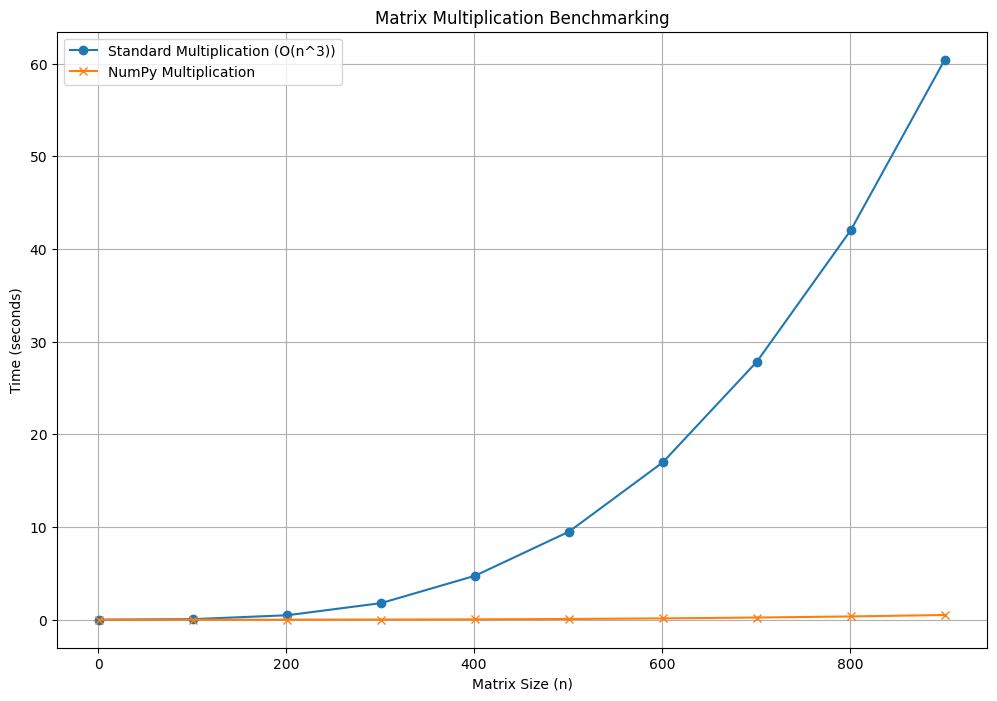

In [4]:
# c) Compare your implementation with the built-in matrix multiplication in NumPy. Find any preferred literature to get familiarized with the concept of (algorithmic) time complexity. Plot the time complexity for both methods as the matrix size increases.


import numpy as np  # import NumPy library 
import matplotlib.pyplot as plt

def benchmark_numpy (A, B): 
        
    start_time = time.time()  
    np.dot(A, B)  # matrix multiplication using NumPy
    end_time = time.time()  

    return end_time - start_time  # elapsed time

numpy_times = []  

for size in matrix_sizes:  
    A, B = generate_matrices(size)
    A_np, B_np = np.array(A), np.array(B)
    numpy_time = benchmark_numpy(A_np, B_np)
    numpy_times.append(numpy_time)
        
    print("Matrix size", size, "x", size, "took", execution_time, "seconds using NumPy multiplication\n")  

# plotting results 
plt.figure(figsize=(12, 8))
plt.plot(matrix_sizes, standard_times, label="Standard Multiplication (O(n^3))", marker='o')
plt.plot(matrix_sizes, numpy_times, label="NumPy Multiplication", marker='x')

plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Benchmarking')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# d) Explain the time complexity of both your implementation and the NumPy implementation. Why do they differ?

    # Implementation of Standard Matrix Multiplication has a time complexity of O(n³) 
        #(O (Operations per element) * n*n*n, as there are three nested loops, each running n times (n is the dimension of the square matrix))

    # NumPy's Matrix Multiplication has an officical time complexity of O(n².⁸⁰⁵) 

    # As we can see, NumPy'S Matrix Multiplication is significantly faster than the Standard Matrix Multiplication Method. As we import NumPy, a linking operation takes place and now, we can use C functions in our Python code. The code therefore runs in the speed, as if it was written in C, which is a lot faster than Python. The Implementation of Standard Matrix Multiplication runs in regular Python speed, running through 3 nested loops, while NumPy's Matrix Multiplication runs in C speed. 

Matrix size 1 x 1 took 0.0 seconds using recursive Strassen's algorithm
Matrix size 1 x 1 took 0.0 seconds using non-recursive Strassen's algorithm
Matrix size 101 x 101 took 1.7829999923706055 seconds using recursive Strassen's algorithm
Matrix size 101 x 101 took 0.0030002593994140625 seconds using non-recursive Strassen's algorithm
Matrix size 201 x 201 took 12.430999755859375 seconds using recursive Strassen's algorithm
Matrix size 201 x 201 took 0.01199960708618164 seconds using non-recursive Strassen's algorithm
Matrix size 301 x 301 took 87.74899983406067 seconds using recursive Strassen's algorithm
Matrix size 301 x 301 took 0.059000253677368164 seconds using non-recursive Strassen's algorithm
Matrix size 401 x 401 took 87.2170000076294 seconds using recursive Strassen's algorithm
Matrix size 401 x 401 took 0.06300020217895508 seconds using non-recursive Strassen's algorithm
Matrix size 501 x 501 took 86.94999980926514 seconds using recursive Strassen's algorithm
Matrix size 50

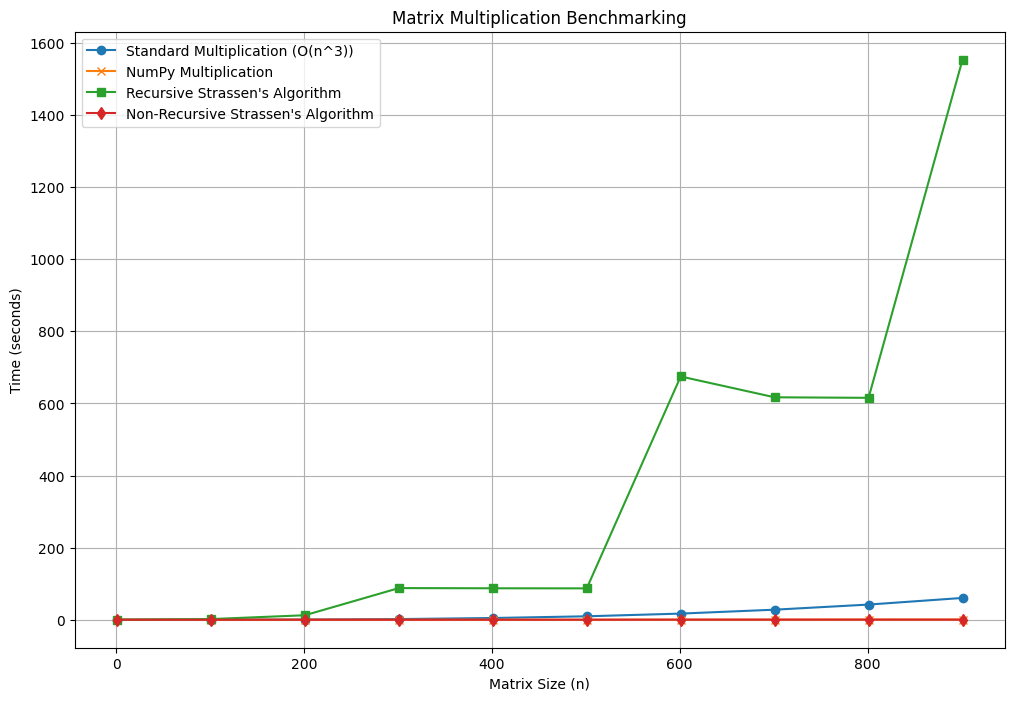

In [6]:
# e) Implement a simple version of Strassen’s algorithm for two-dimensional matrices (with and without the recursion) and compare its performance with your na ̈ıve approach and your implementation with NumPy. You can use any reference of your choice to get familiarized with Strassen’s algorithm.


def matrix_add(A, B):
    return [[A[i][j] + B[i][j] for j in range(len(A[i]))] for i in range(len(A))]

def matrix_subtract(A, B):
    return [[A[i][j] - B[i][j] for j in range(len(A[i]))] for i in range(len(A))]

# benchmark Strassen's algorithm
strassen_times = []

def strassen_matrix_multiply(A, B, original_size=None):
    # base case when the matrix is 1x1
    if len(A) == 1:
        return [[A[0][0] * B[0][0]]]

    # store original size if it's the first call
    if original_size is None:
        original_size = len(A)

    # find  middle index for partitioning
    n = len(A)
    mid = n // 2

    # divide A into 4 sub-matrices
    A11 = [row[:mid] for row in A[:mid]]
    A12 = [row[mid:] for row in A[:mid]]
    A21 = [row[:mid] for row in A[mid:]]
    A22 = [row[mid:] for row in A[mid:]]

    # divide B into 4 sub-matrices
    B11 = [row[:mid] for row in B[:mid]]
    B12 = [row[mid:] for row in B[:mid]]
    B21 = [row[:mid] for row in B[mid:]]
    B22 = [row[mid:] for row in B[mid:]]

    # calculate the 7 products using strassen's formula
    M1 = strassen_matrix_multiply(matrix_add(A11, A22), matrix_add(B11, B22), original_size)
    M2 = strassen_matrix_multiply(matrix_add(A21, A22), B11, original_size)
    M3 = strassen_matrix_multiply(A11, matrix_subtract(B12, B22), original_size)
    M4 = strassen_matrix_multiply(A22, matrix_subtract(B21, B11), original_size)
    M5 = strassen_matrix_multiply(matrix_add(A11, A12), B22, original_size)
    M6 = strassen_matrix_multiply(matrix_subtract(A21, A11), matrix_add(B11, B12), original_size)
    M7 = strassen_matrix_multiply(matrix_subtract(A12, A22), matrix_add(B21, B22), original_size)

    # combine the results into new matrix C
    C11 = matrix_add(matrix_subtract(matrix_add(M1, M4), M5), M7)
    C12 = matrix_add(M3, M5)
    C21 = matrix_add(M2, M4)
    C22 = matrix_add(matrix_subtract(matrix_add(M1, M3), M2), M6)

    # combine quadrants into a single result matrix
    new_size = len(C11)
    C = [[0] * (2 * new_size) for _ in range(2 * new_size)]
    for i in range(new_size):
        for j in range(new_size):
            C[i][j] = C11[i][j]
            C[i][j + new_size] = C12[i][j]
            C[i + new_size][j] = C21[i][j]
            C[i + new_size][j + new_size] = C22[i][j]

    # return only relevant part of the result (since matrices are padded)
    return [row[:original_size] for row in C[:original_size]]

def strassen_matrix_multiply_non_recursive(A, B):
    # padding matrices to the nearest power of 2
    A = pad_matrix_to_power_of_two(A)  # Padding A
    B = pad_matrix_to_power_of_two(B)  # Padding B
    n = len(A)

    # if matrix is size 1, directly multiply 
    if n == 1:
        return [[A[0][0] * B[0][0]]]

    # initialize result matrix
    C = [[0 for _ in range(n)] for _ in range(n)]

    # stack to simulate recursion (each entry contains matrices A, B, C, and current size)
    stack = [(A, B, C, n)]

   
    while stack:
        A, B, C, n = stack.pop()

        if n == 1:  # GREEN: Directly compute base case multiplication
            C[0][0] = A[0][0] * B[0][0]
            continue

        # find the midpoint to split matrices
        mid = n // 2

        # divide matrices into sub-matrices
        A11 = [row[:mid] for row in A[:mid]]
        A12 = [row[mid:] for row in A[:mid]]
        A21 = [row[:mid] for row in A[mid:]]
        A22 = [row[mid:] for row in A[mid:]]

        B11 = [row[:mid] for row in B[:mid]]
        B12 = [row[mid:] for row in B[:mid]]
        B21 = [row[:mid] for row in B[mid:]]
        B22 = [row[mid:] for row in B[mid:]]

        # allocate space for sub-matrices of C
        C11 = [[0] * mid for _ in range(mid)]
        C12 = [[0] * mid for _ in range(mid)]
        C21 = [[0] * mid for _ in range(mid)]
        C22 = [[0] * mid for _ in range(mid)]

       
        stack.append((matrix_add(A11, A22), matrix_add(B11, B22), C11, mid)) 


    # return final combined result 
    return C

# benchmarking Strassen Algorithms
# added benchmarking for both recursive and non-recursive versions

recursive_strassen_times = []
non_recursive_strassen_times = []



for size in matrix_sizes:
    # generate original matrices
    A, B = generate_matrices(size)
    
    # pad matrices to the nearest power of two
    A_padded = pad_matrix_to_power_of_two(A)
    B_padded = pad_matrix_to_power_of_two(B)
    
    # benchmark recursive strassen multiplication using the padded matrices
    execution_time_recursive = benchmark(strassen_matrix_multiply, A_padded, B_padded)
    recursive_strassen_times.append(execution_time_recursive)
    print("Matrix size", size, "x", size, "took", execution_time_recursive, "seconds using recursive Strassen's algorithm")

    # benchmark non-recursive strassen multiplication using the padded matrices
    execution_time_non_recursive = benchmark(strassen_matrix_multiply_non_recursive, A_padded, B_padded)
    non_recursive_strassen_times.append(execution_time_non_recursive)
    print("Matrix size", size, "x", size, "took", execution_time_non_recursive, "seconds using non-recursive Strassen's algorithm")

# plotting Strassen's algorithm
plt.figure(figsize=(12, 8))
plt.plot(matrix_sizes, standard_times, label="Standard Multiplication (O(n^3))", marker='o')
plt.plot(matrix_sizes, numpy_times, label="NumPy Multiplication", marker='x')
plt.plot(matrix_sizes, recursive_strassen_times, label="Recursive Strassen's Algorithm", marker='s')
plt.plot(matrix_sizes, non_recursive_strassen_times, label="Non-Recursive Strassen's Algorithm", marker='d')

plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Benchmarking')
plt.legend()
plt.grid(True)
plt.show()



# Comparison: 
    # Standard Naïve Multiplication (O(n³)): classic approach, every element calculated individually. simple, but is slow for large matrices, due to its cubic complexity.
    # NumPy Multiplication: uses low-level implementations to speed up matrix multiplication. much faster than the naive approach, especially as the matrix grows.
    # Recursive Strassen's Algorithm: splits matrix into smaller parts and reduces # of multiplications needed. slower for medium large functions than NumPy, but can catch up for larger sizes. 
    # Non-Recursive Strassen's Algorithm: uses stack rather than function calls, which can reduce some overhead with recursion. usually faster than the rescursive strassens. not as optimized as NumPy.

